In [5]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [63]:
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,801.123775,711.181225,737.205450,817.977250,751.644375


In [8]:
data.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
data.shape


(907, 27)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [11]:
data.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
#country, country_long are just the name, and here we are data only for india, so droping this will not effect on output.
data.drop(['country', 'country_long','generation_gwh_2013','generation_gwh_2019'], inplace= True, axis= 1)


In [13]:
data.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source'], inplace= True, axis= 1)


In [14]:
data.drop(['year_of_capacity_data'], inplace= True, axis= 1)


In [15]:
data.isnull().sum()


name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [16]:
#data['generation_gwh_2013'].fillna(value=data['generation_gwh_2013'].median(), inplace= True)
data['generation_gwh_2014'].fillna(value=data['generation_gwh_2014'].median(), inplace= True)
data['generation_gwh_2015'].fillna(value=data['generation_gwh_2015'].median(), inplace= True)
data['generation_gwh_2016'].fillna(value=data['generation_gwh_2016'].median(), inplace= True)
data['generation_gwh_2017'].fillna(value=data['generation_gwh_2017'].median(), inplace= True)
data['generation_gwh_2018'].fillna(value=data['generation_gwh_2018'].median(), inplace= True)
#data['generation_gwh_2019'].fillna(value=data['generation_gwh_2019'].median(), inplace= True)

In [17]:
data['latitude'].fillna(value=data['latitude'].mean(), inplace= True)
data['longitude'].fillna(value=data['longitude'].mean(), inplace= True) 

In [18]:
data.isnull().sum()


name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [175]:

data.shape

(907, 9)

In [19]:
data.isnull().sum()


name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

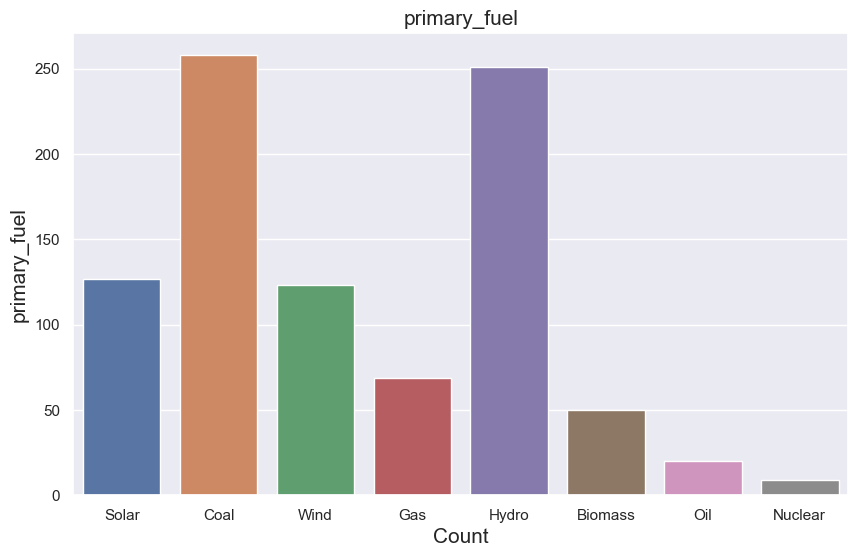

In [20]:
#Univariate analysis
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(data['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)
data['primary_fuel'].value_counts()

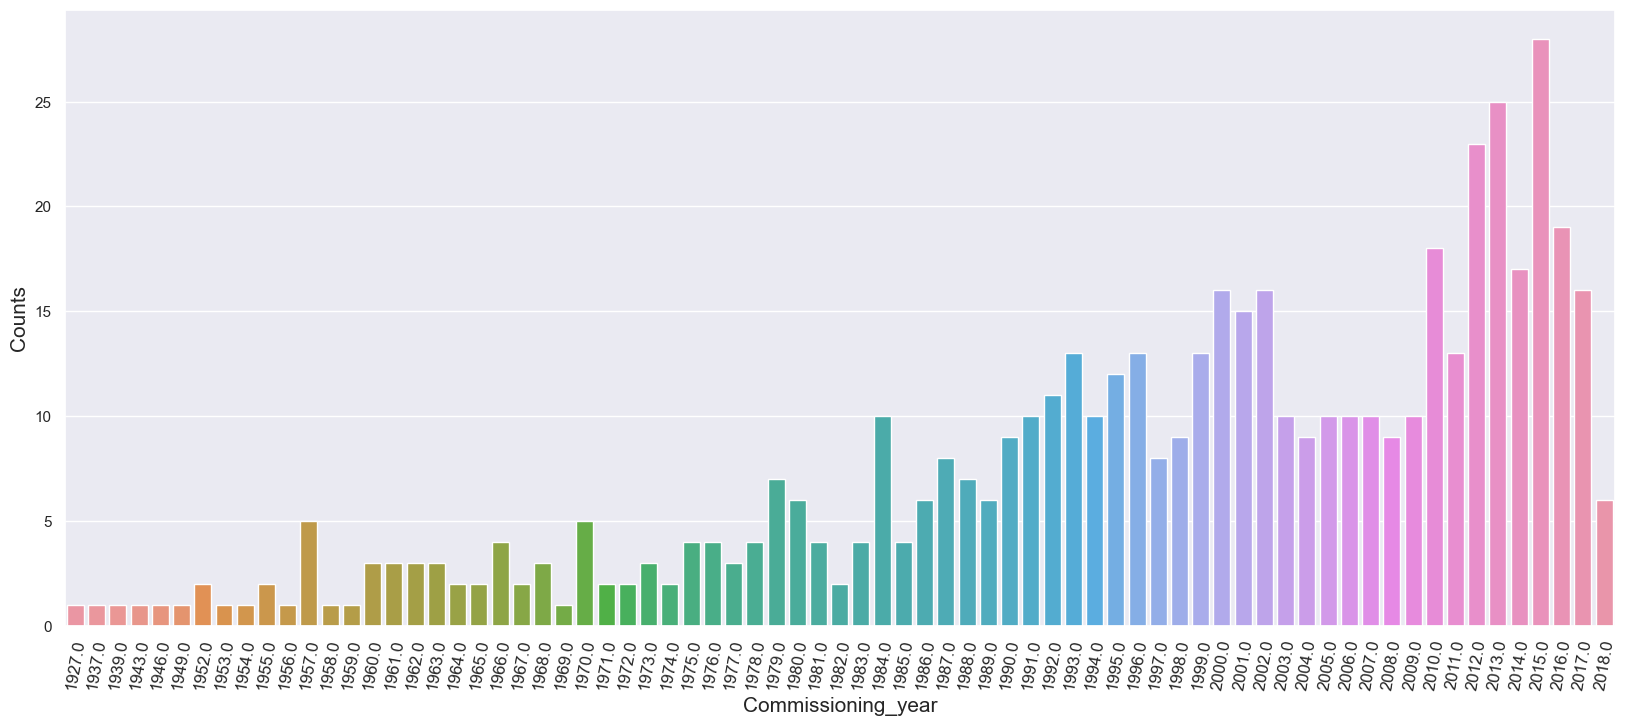

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(data['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

In [22]:
data['owner'].value_counts()


Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

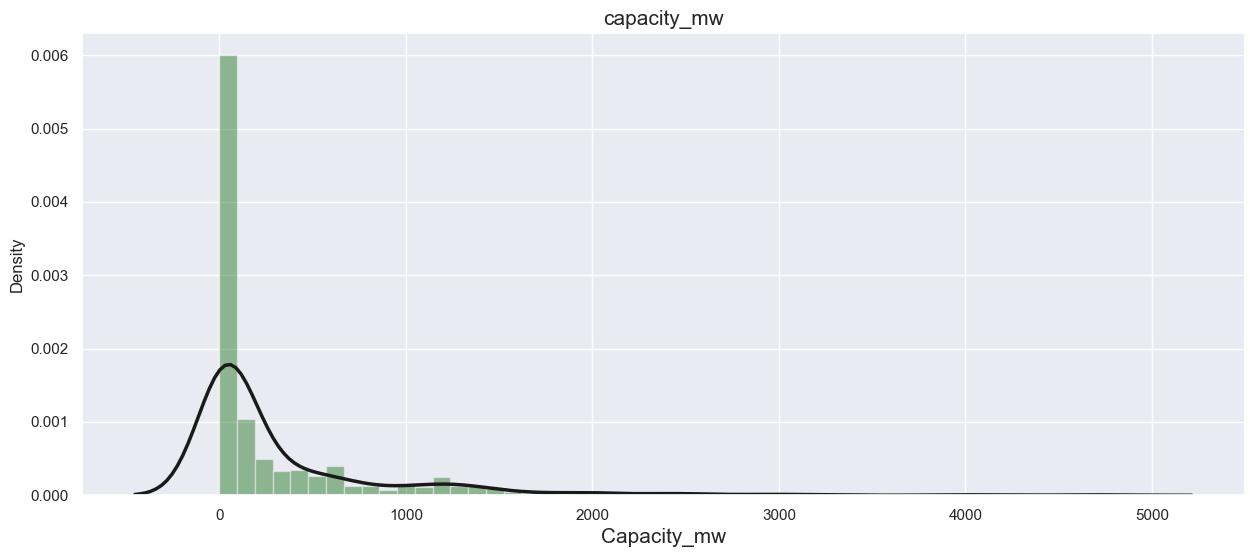

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(data['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

In [24]:
#Here we can see the probablity of capacity greater than 1000 is less.
#Data is not normaly distributed.
#Data having outliers.

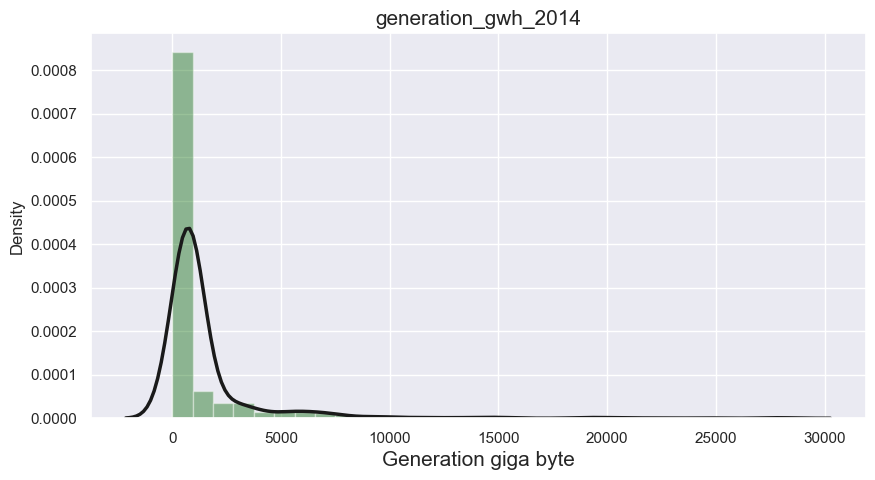

In [25]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

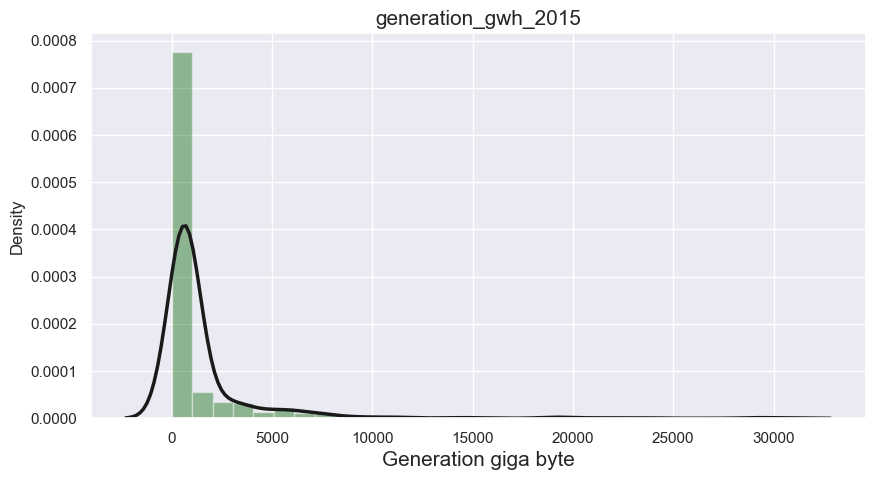

In [26]:

plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

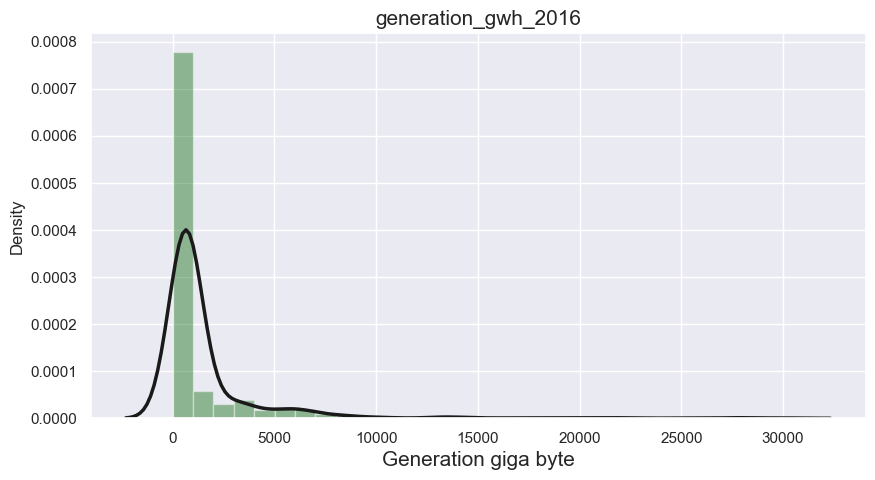

In [27]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

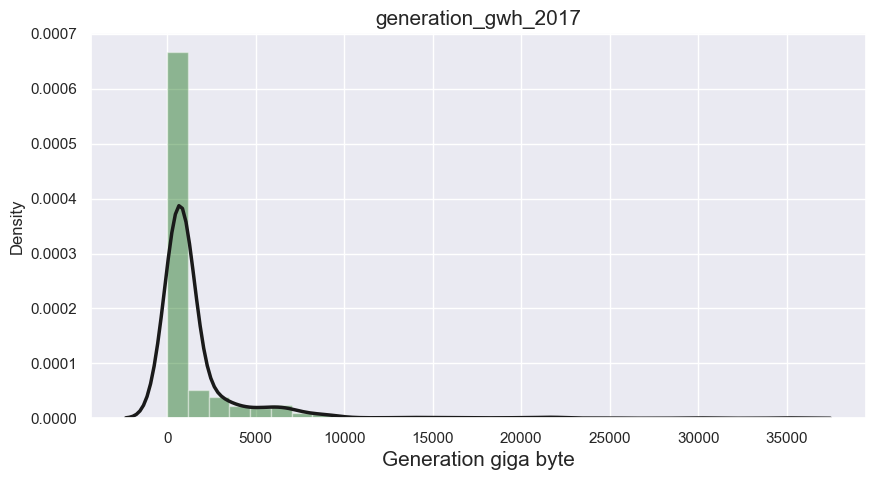

In [28]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

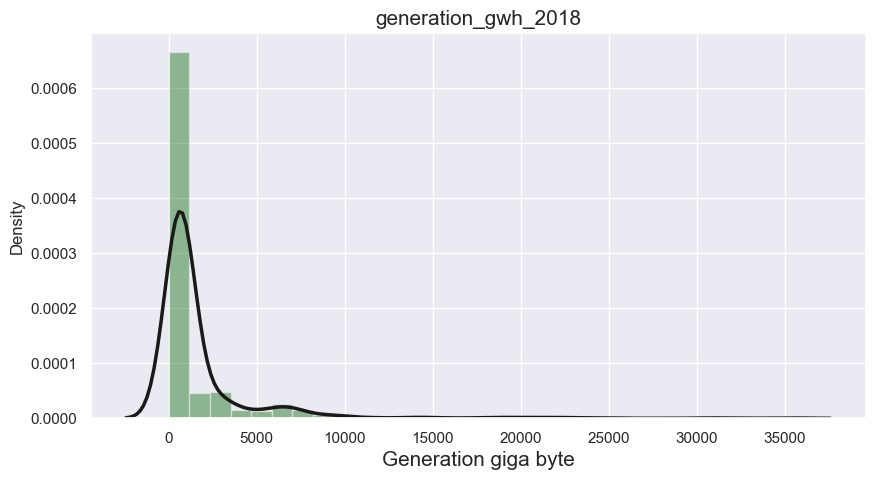

In [29]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2018'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

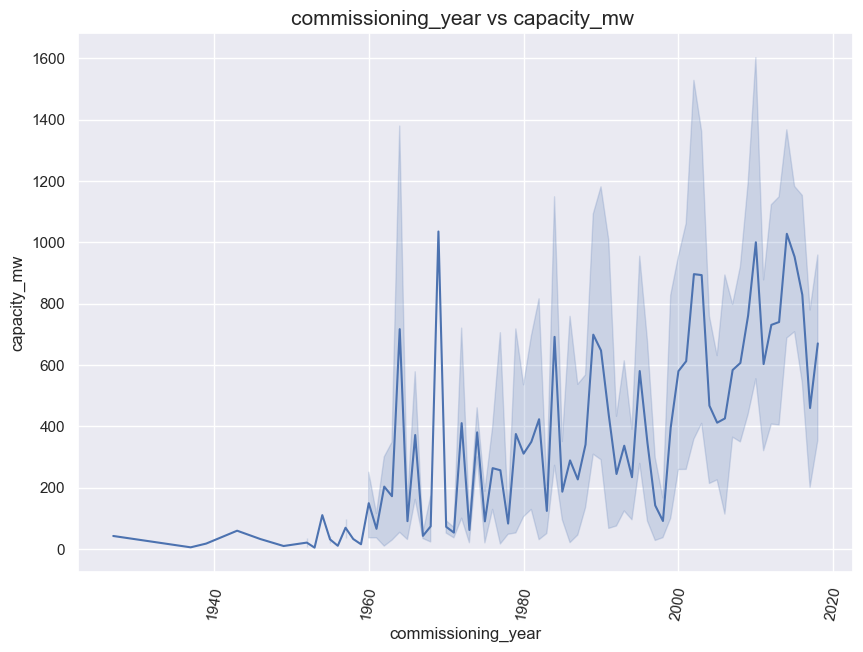

In [30]:
#Bivariate Analysis
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()
#Here we can see with increase in the years the devlopment of plants incerases and and capcaity also incresed.



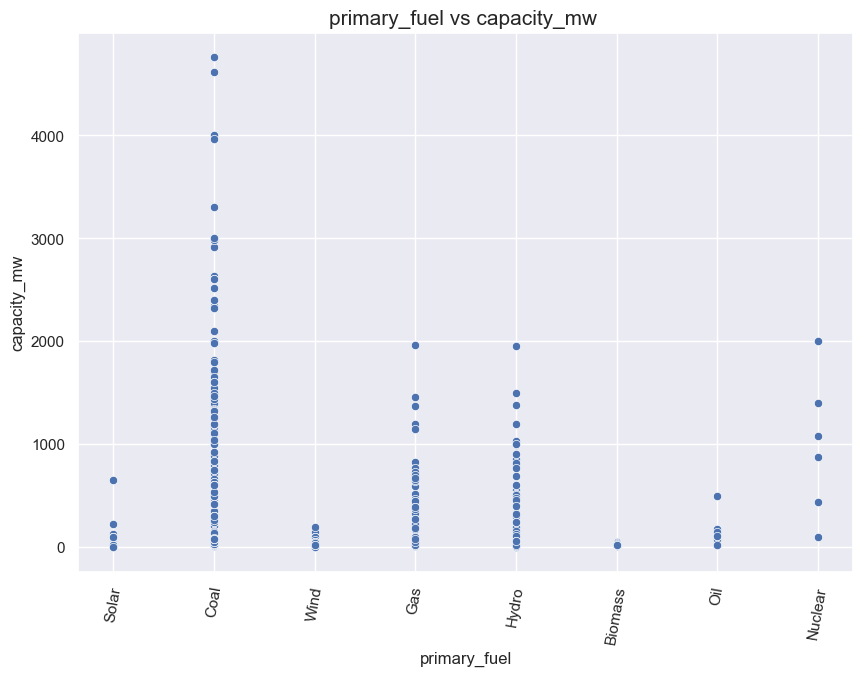

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

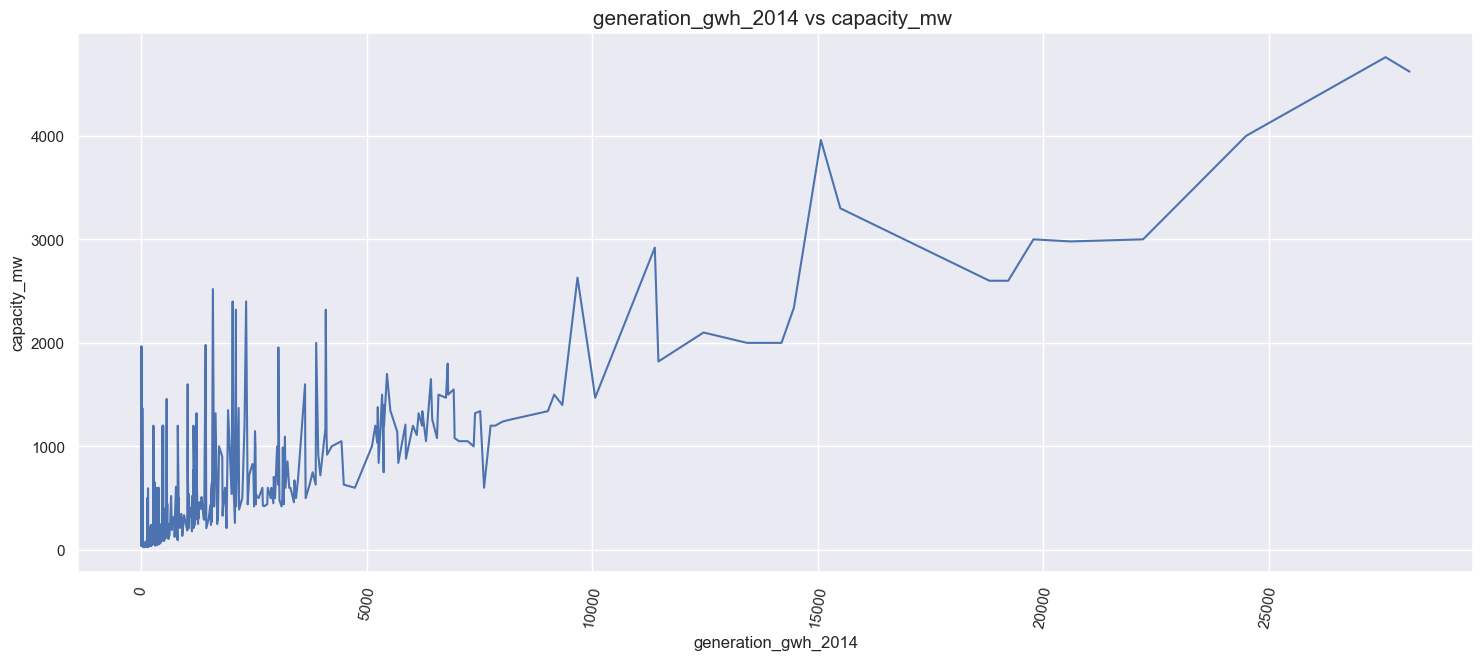

In [32]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

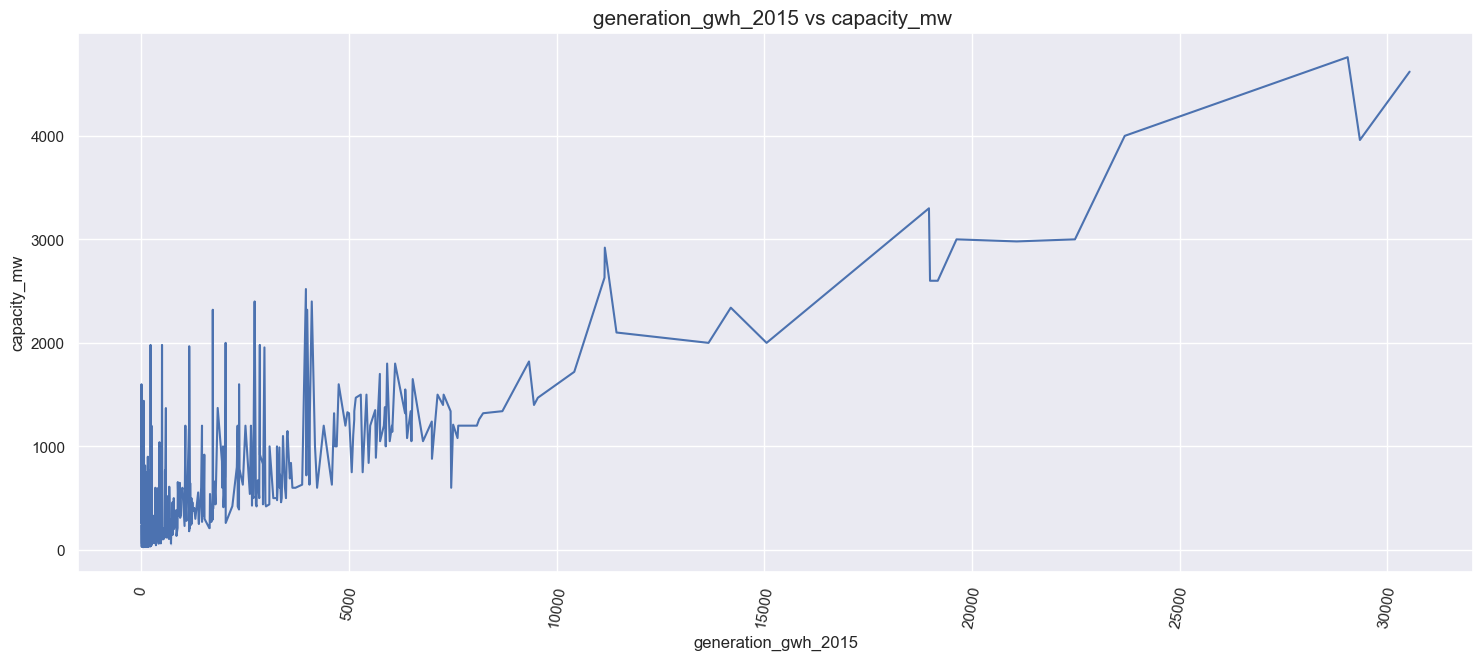

In [33]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

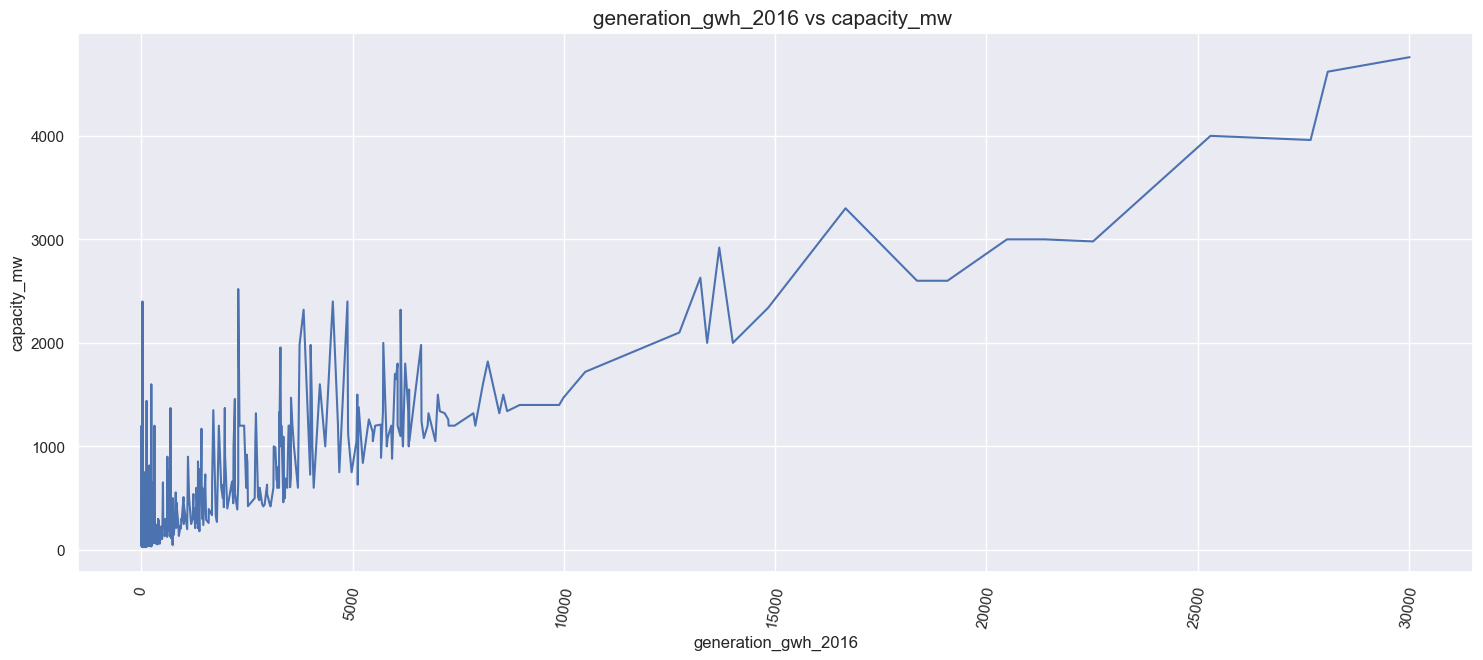

In [34]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

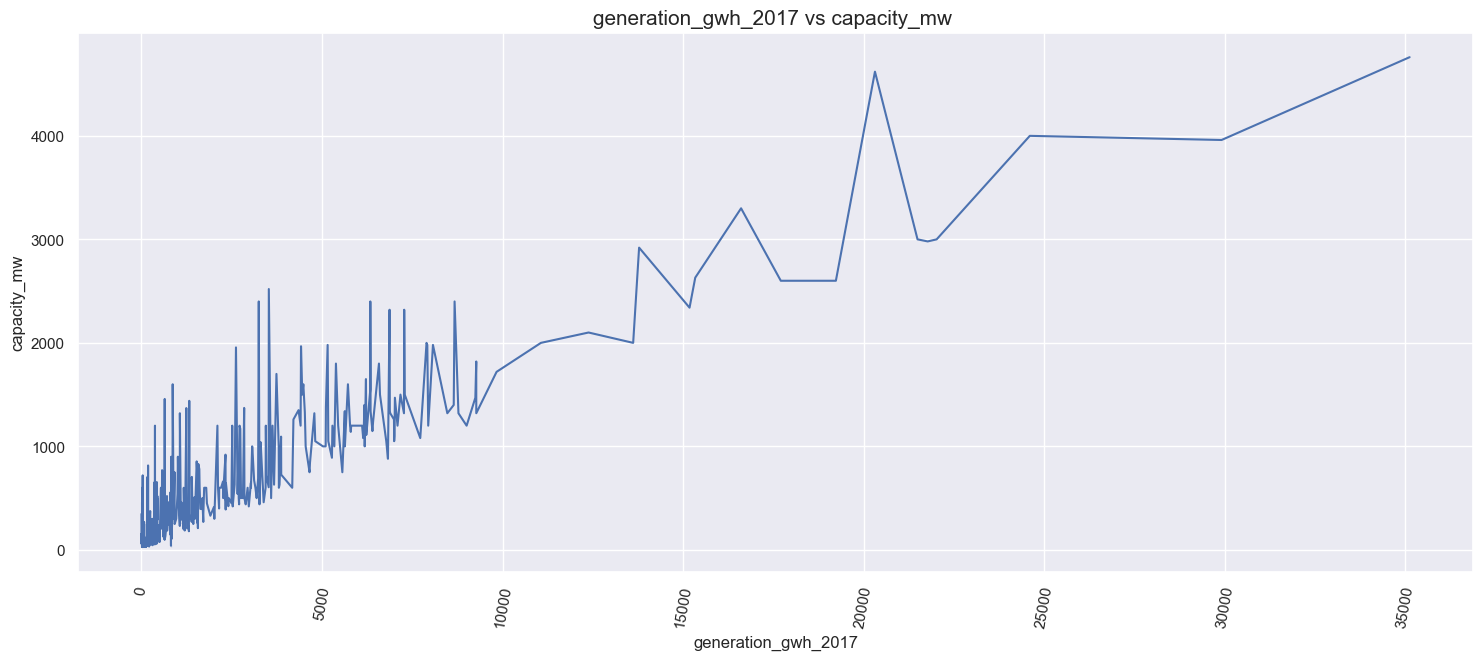

In [35]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

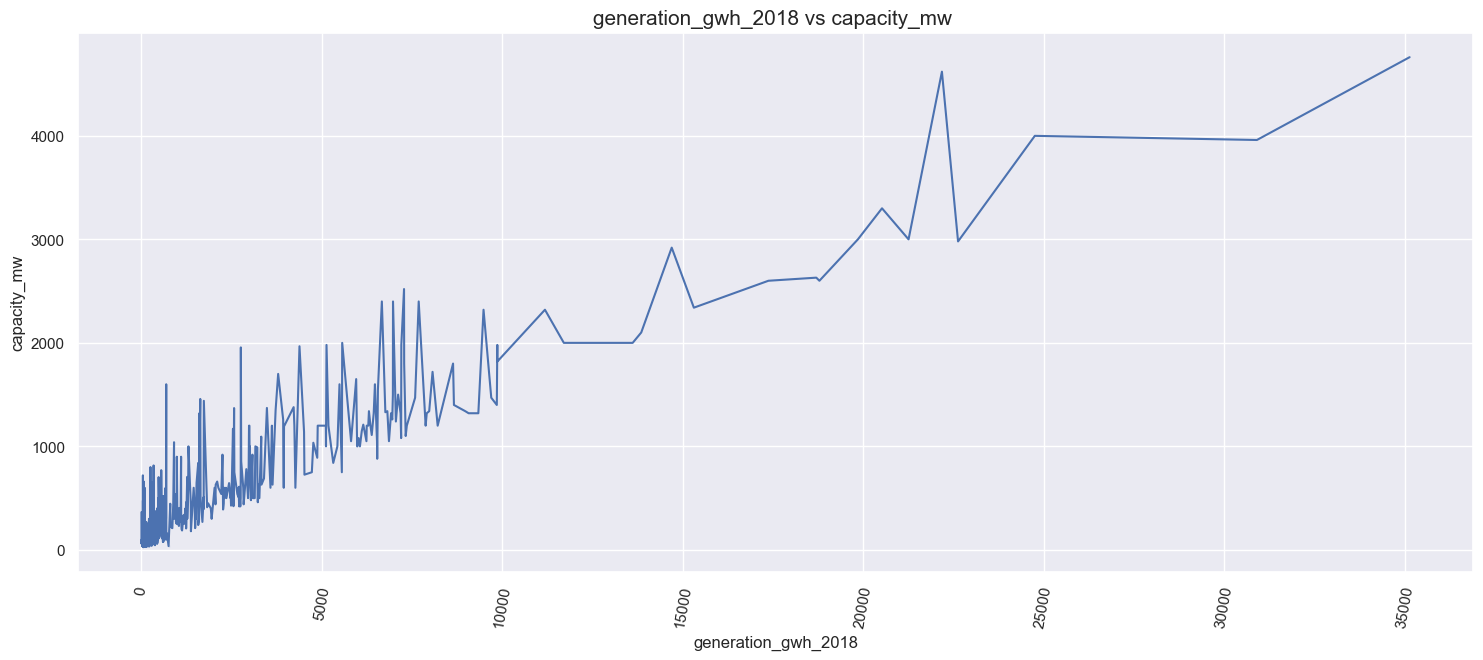

In [36]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2018',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

In [78]:
data.head(2)


,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375


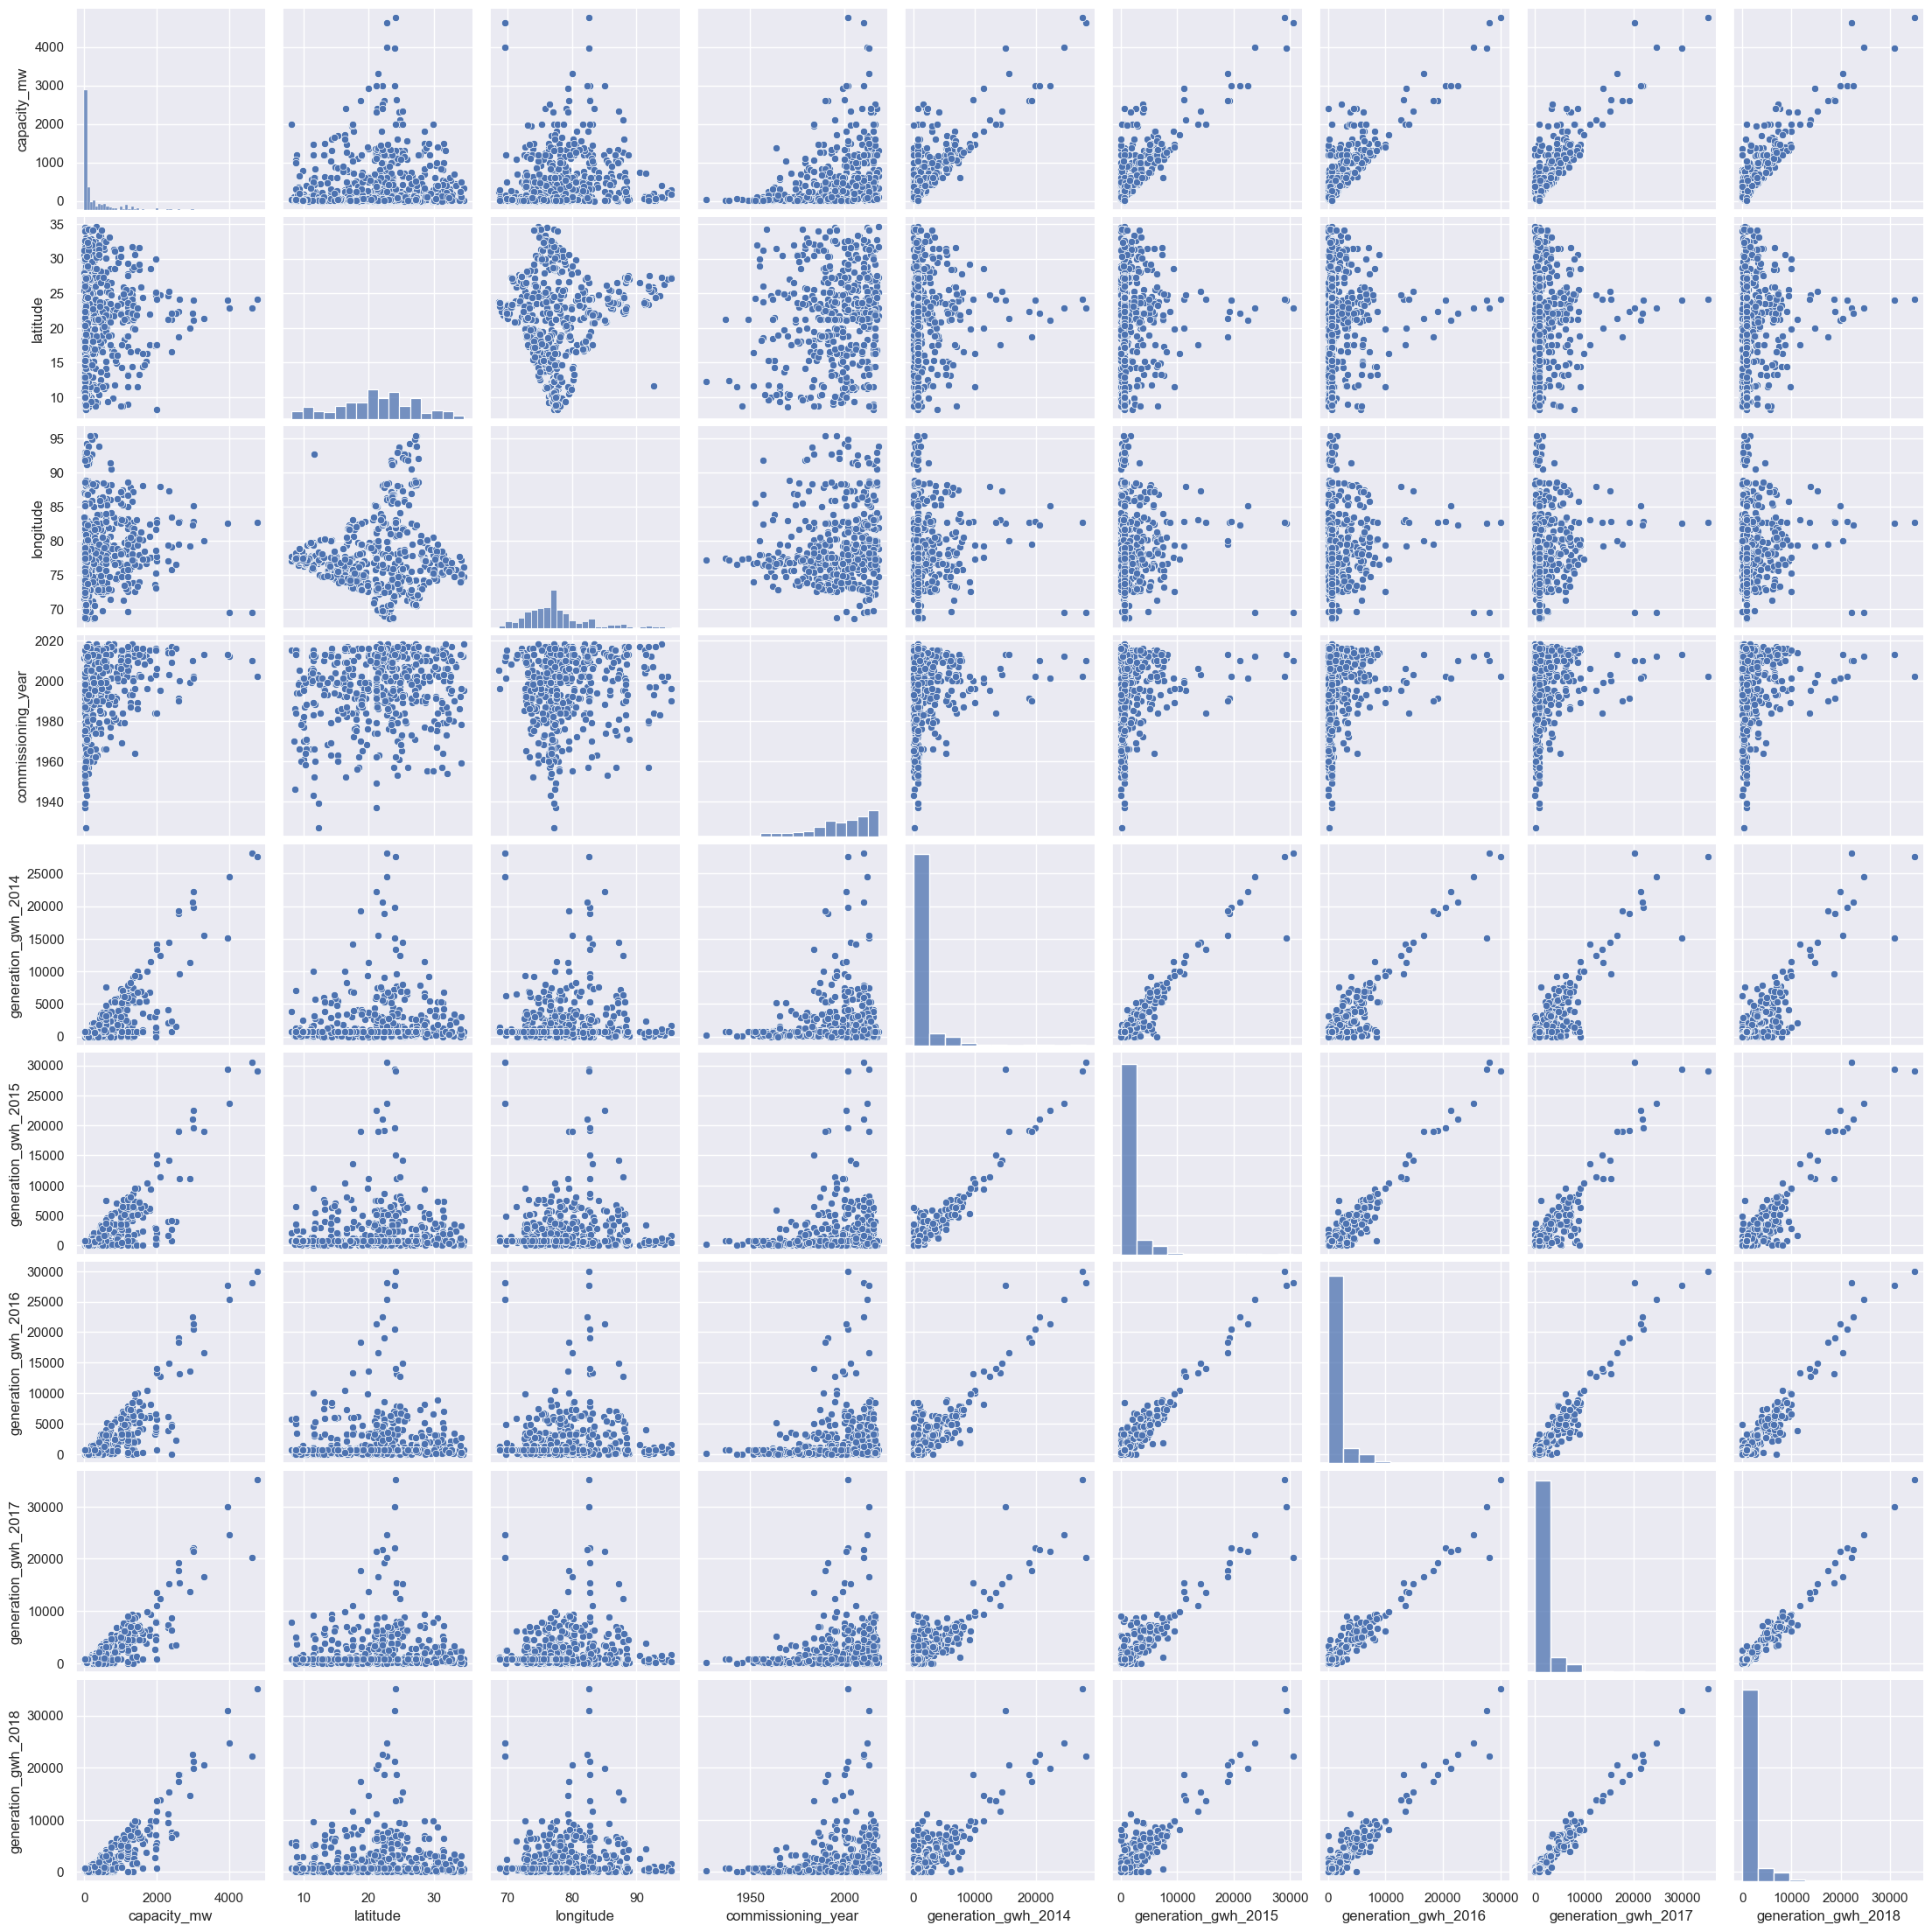

In [39]:
#Multivariate analysis
sns.pairplot(data)



In [40]:
'''EDA Summary
capacity_mw: we can see capacity is mostly dependent on Coal.
latitude & longitude : They are not playing very good role in capacity_mw.
primary_fuel: Mostly Coal is used as primary fuel.
commissioning_year: we can see capacity incerases after 2000.
generation_gwh_2013-2017: we can see generation growth is almost same for each year'''

'EDA Summary\ncapacity_mw: we can see capacity is mostly dependent on Coal.\nlatitude & longitude : They are not playing very good role in capacity_mw.\nprimary_fuel: Mostly Coal is used as primary fuel.\ncommissioning_year: we can see capacity incerases after 2000.\ngeneration_gwh_2013-2017: we can see generation growth is almost same for each year'

In [41]:
#Data Processing
#Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.
data.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)


In [116]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [117]:
#Encoding Target columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

In [118]:
data.head(3)


,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.20545,817.97725,751.644375


In [42]:
data.corr()


,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,0.104649,0.121513,0.143459,0.151712,0.155063
generation_gwh_2014,0.793497,0.058594,0.104649,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,0.895143,0.933161,0.964988,0.986685,1.000000


<AxesSubplot:>

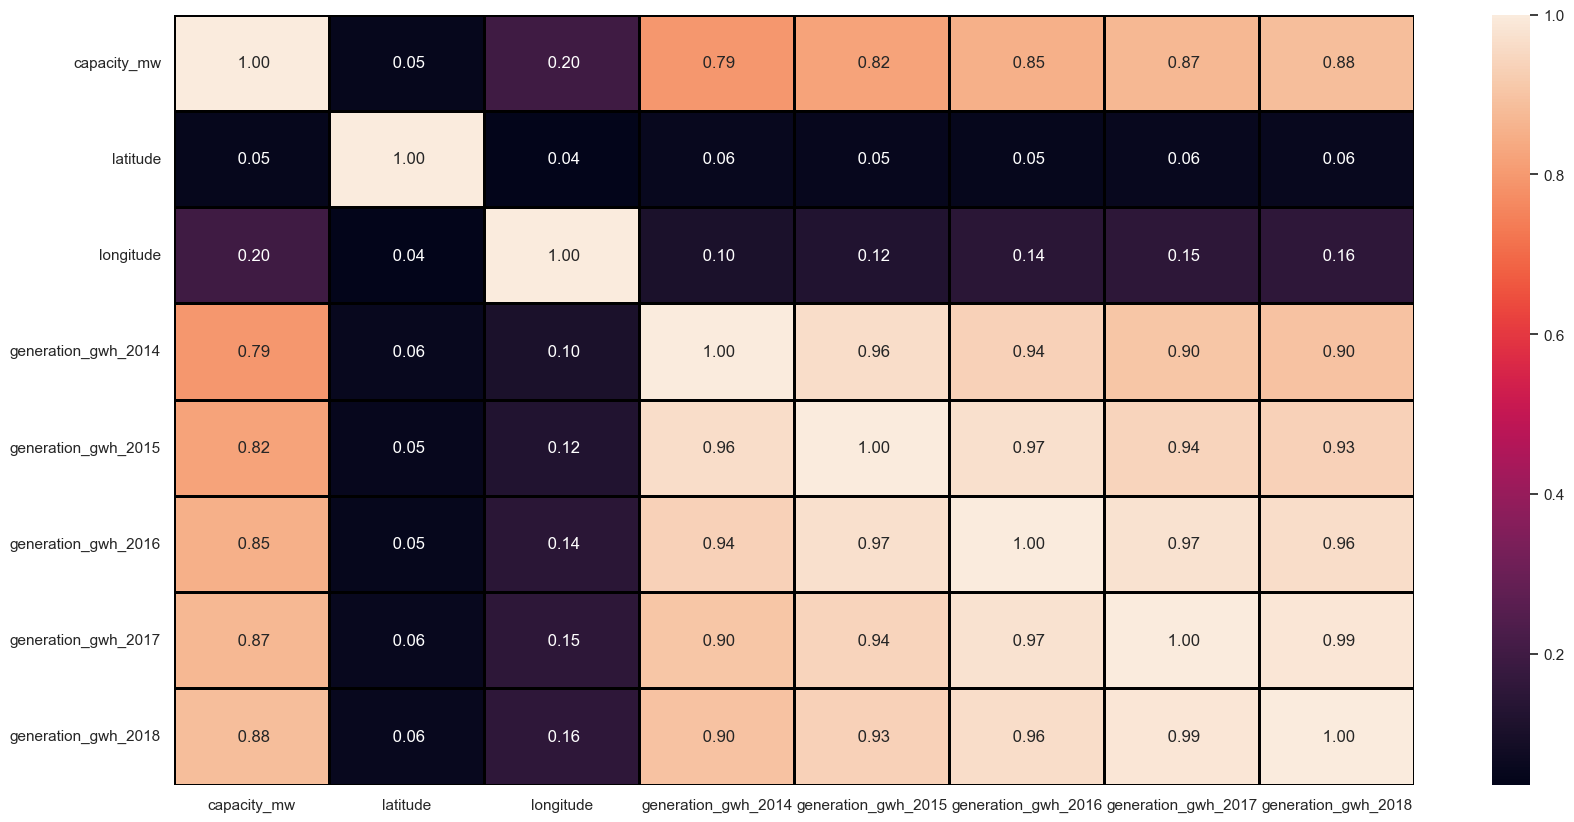

In [70]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )


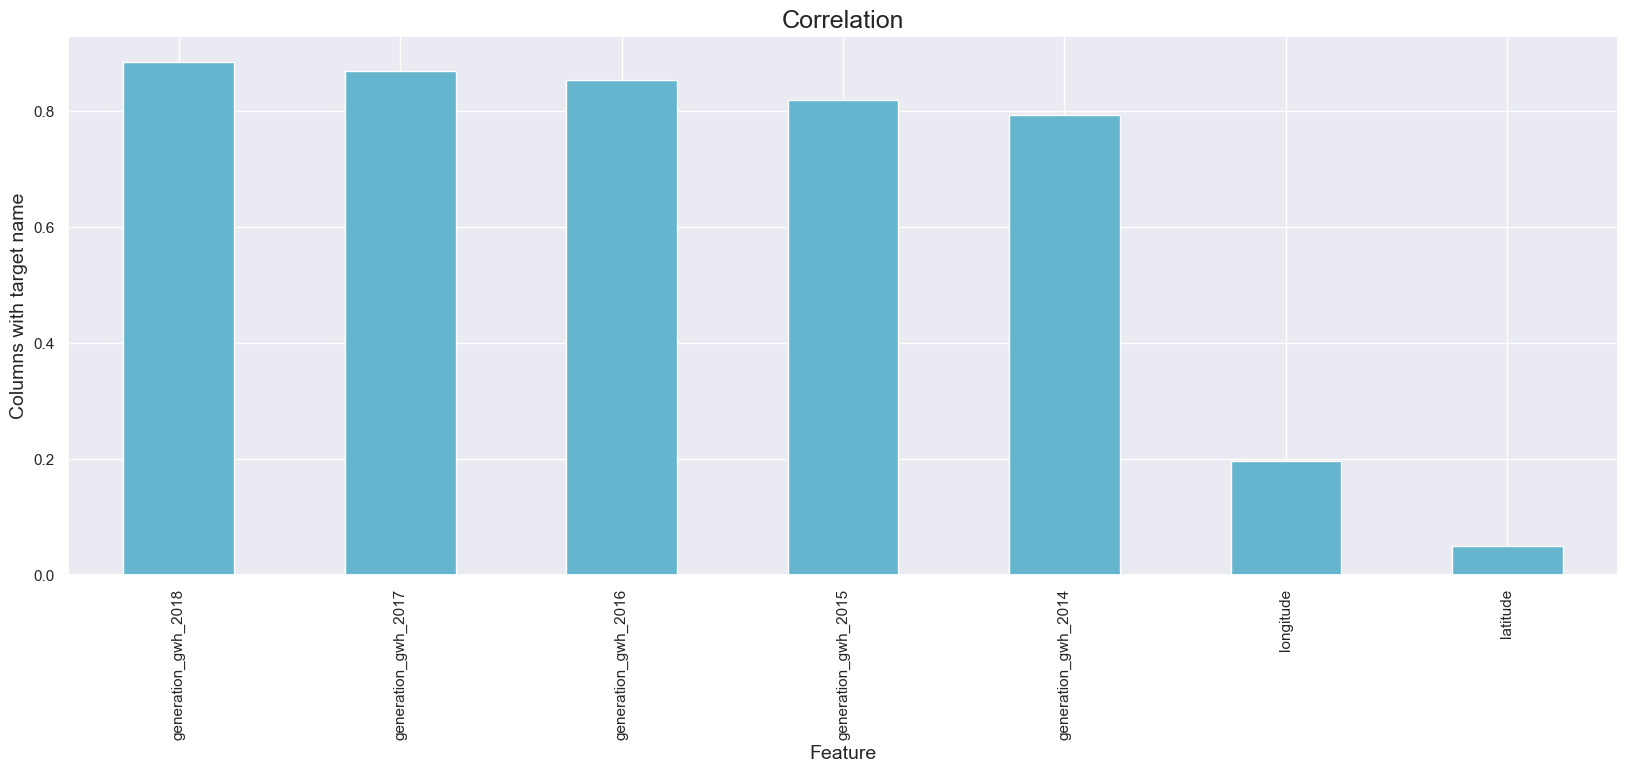

In [71]:
plt.figure(figsize=(20,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [72]:
'''Here we can see only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

From heat map we can see generation growth columns are highly correlacted with each other.'''

'Here we can see only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.\n\nFrom heat map we can see generation growth columns are highly correlacted with each other.'

<AxesSubplot:>

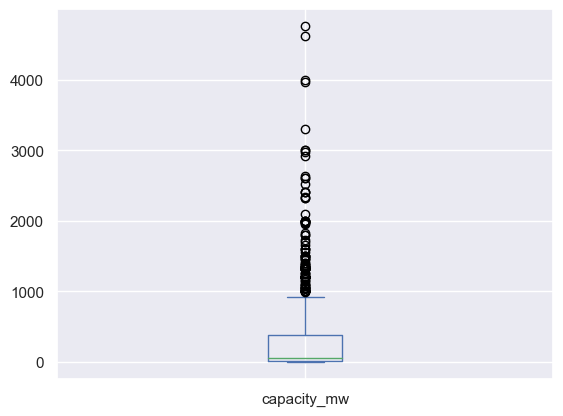

In [73]:
#Checking outliers
data['capacity_mw'].plot.box()


<AxesSubplot:>

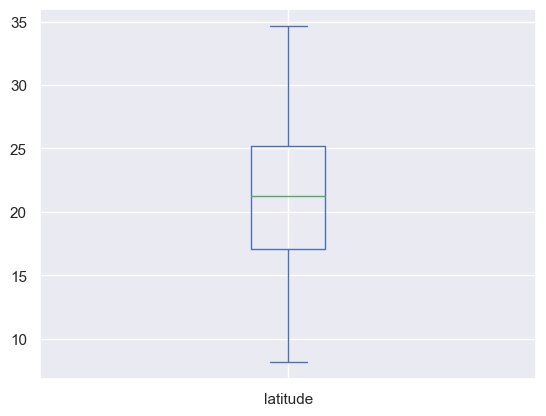

In [74]:
data['latitude'].plot.box()


<AxesSubplot:>

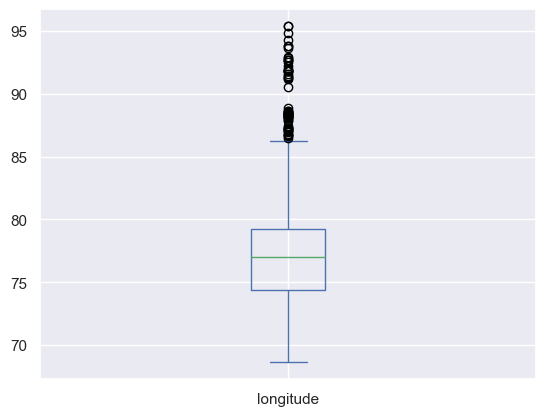

In [75]:
data['longitude'].plot.box()


<AxesSubplot:>

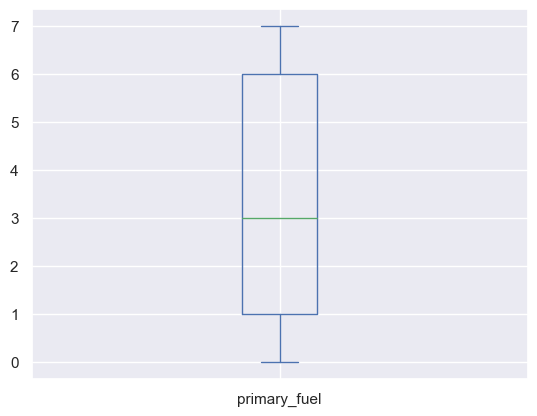

In [79]:
data['primary_fuel'].plot.box()


<AxesSubplot:>

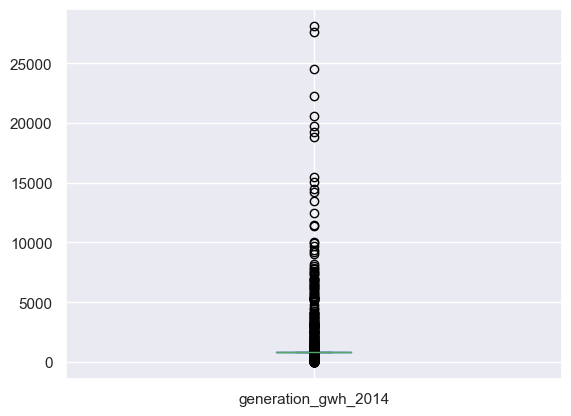

In [80]:

data['generation_gwh_2014'].plot.box()


<AxesSubplot:>

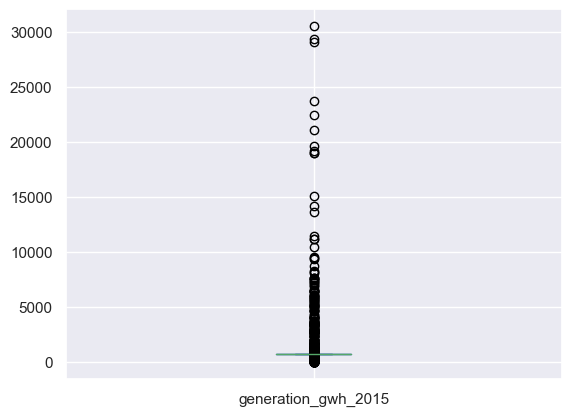

In [81]:
data['generation_gwh_2015'].plot.box()


<AxesSubplot:>

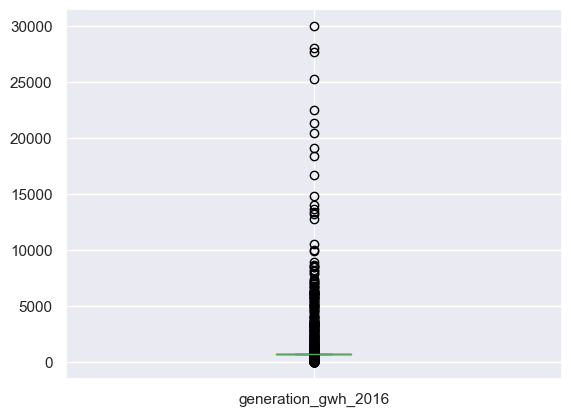

In [82]:
data['generation_gwh_2016'].plot.box()


<AxesSubplot:>

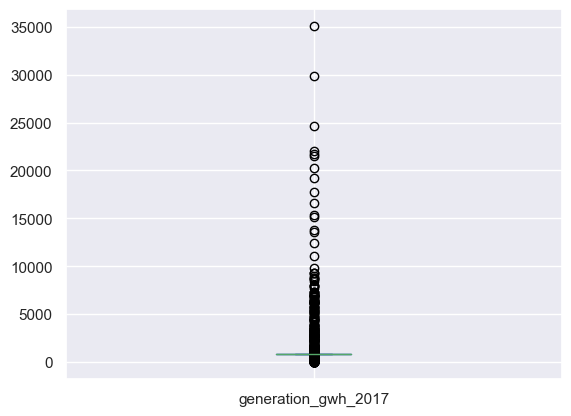

In [83]:
data['generation_gwh_2017'].plot.box()


<AxesSubplot:>

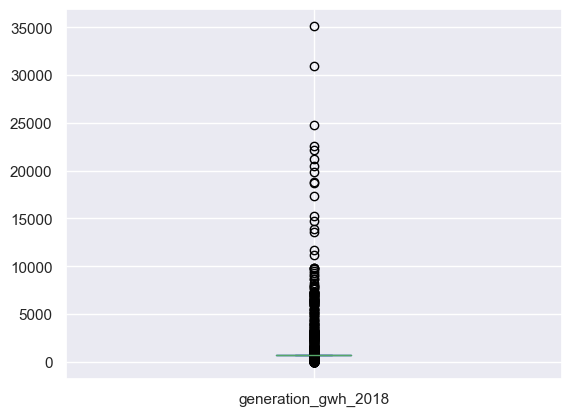

In [84]:
data['generation_gwh_2018'].plot.box()


In [85]:
#Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))

In [86]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [87]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 9)
(866, 9)


In [88]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


In [89]:
#Data loss is less than the 1ess than 10 percent, we canproceed with new data.

df.shape


(866, 9)

In [90]:
df.head(2)


,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375


In [91]:
#Removing skewness
df.skew()


capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [92]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df.drop(['capacity_mw'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [93]:
X=pd.DataFrame(data=x)


In [94]:
#Scaling the data Using StandardScaler.
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [95]:
#Our data is now scaled, in next step we will check multicollinearity.
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
data.columns


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [97]:
dfx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [98]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [99]:
calc_vif(dfx)


,variables,VIF FACTOR
0,latitude,1.023721
1,longitude,1.174497
2,primary_fuel,1.194083
3,generation_gwh_2013,3.576558
4,generation_gwh_2014,6.279617
5,generation_gwh_2015,10.757296
6,generation_gwh_2016,9.758001
7,generation_gwh_2017,9.231482


In [100]:
dfx.drop('generation_gwh_2016', axis=1, inplace=True )


In [101]:
calc_vif(dfx)


,variables,VIF FACTOR
0,latitude,1.023069
1,longitude,1.170270
2,primary_fuel,1.194041
3,generation_gwh_2013,3.573556
4,generation_gwh_2014,6.231846
5,generation_gwh_2015,9.384808
6,generation_gwh_2017,5.186089


In [102]:
x=dfx


In [103]:
#Vif is less than 10 we can proceed for model development
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [104]:
#1.LinearRegression
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 79 The model perform very well
At random State: 79
Training r2_score 44.60527056969886
Testing r2 score  44.62216731068993
At Random state 247 The model perform very well
At random State: 247
Training r2_score 45.13500452283089
Testing r2 score  45.123068343064666
At Random state 388 The model perform very well
At random State: 388
Training r2_score 45.31560174339568
Testing r2 score  45.329503097534506
At Random state 712 The model perform very well
At random State: 712
Training r2_score 45.23569449783311
Testing r2 score  45.15546777086898
At Random state 765 The model perform very well
At random State: 765
Training r2_score 44.27706964308557
Testing r2 score  44.33546131244539


In [105]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 912)


In [106]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.47074042071750233


In [107]:
#Lets check model for cross validation
#Cross Validation of Model
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 42.01304198312335 and Accuracy score is 47.074042071750235
At cross fold 3 the Cross Val score is 40.56325621982471 and Accuracy score is 47.074042071750235
At cross fold 4 the Cross Val score is 40.70349748278589 and Accuracy score is 47.074042071750235
At cross fold 5 the Cross Val score is 40.88217407708893 and Accuracy score is 47.074042071750235
At cross fold 6 the Cross Val score is 41.245255618670534 and Accuracy score is 47.074042071750235
At cross fold 7 the Cross Val score is 37.92815497447877 and Accuracy score is 47.074042071750235
At cross fold 8 the Cross Val score is 40.13020591734229 and Accuracy score is 47.074042071750235
At cross fold 9 the Cross Val score is 39.837022896212886 and Accuracy score is 47.074042071750235


In [108]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 222.5588779427736
Mean Squared Error: 86797.88249588292
Root Mean Square Error: 294.61480359256035


In [109]:
'''We can see cv score is very low, But it is having less diffrence with respect to other cv.
So we can take cv=8, But model performance is low, lets try anaother model.'''

'We can see cv score is very low, But it is having less diffrence with respect to other cv.\nSo we can take cv=8, But model performance is low, lets try anaother model.'

In [110]:
#2. Lasso
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 


R2 score: 47.20226293538599
Cross val Score : 40.63865163705673


In [111]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 222.28678824839932
Mean Squared Error: 86587.60194752771
Root Mean Square Error: 294.2577134885808


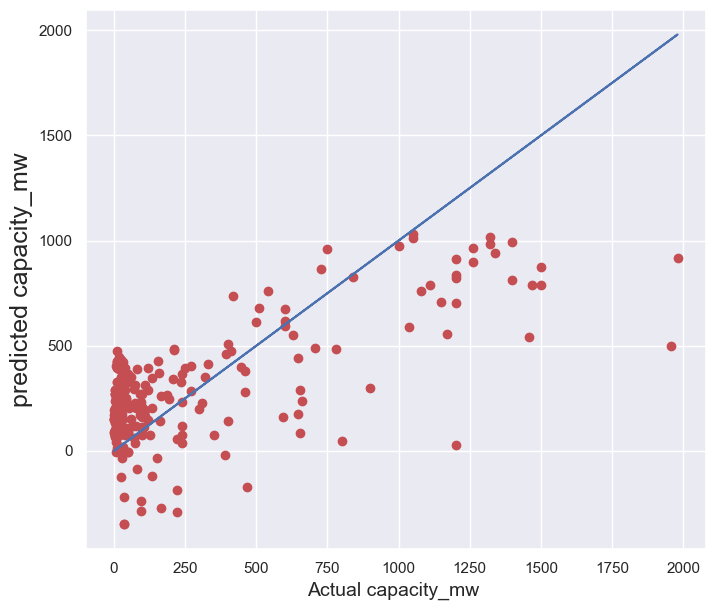

In [112]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [113]:
#3. Ridge
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  47.085532706027166
Cross val Score 40.169256964489406


In [114]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 222.56136738778852
Mean Squared Error: 86779.0380051488
Root Mean Square Error: 294.5828202817483


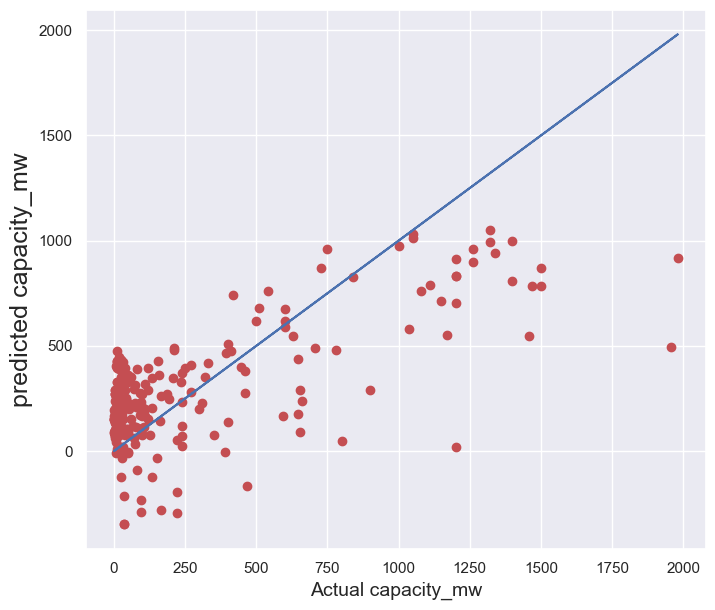

In [115]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [116]:
#3. Decision TreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 69.22707848582141
Cross Val Score: 56.92588004562862


In [117]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 111.27664615384614
Mean Squared Error: 50467.19096258462
Root Mean Square Error: 224.64903953185424


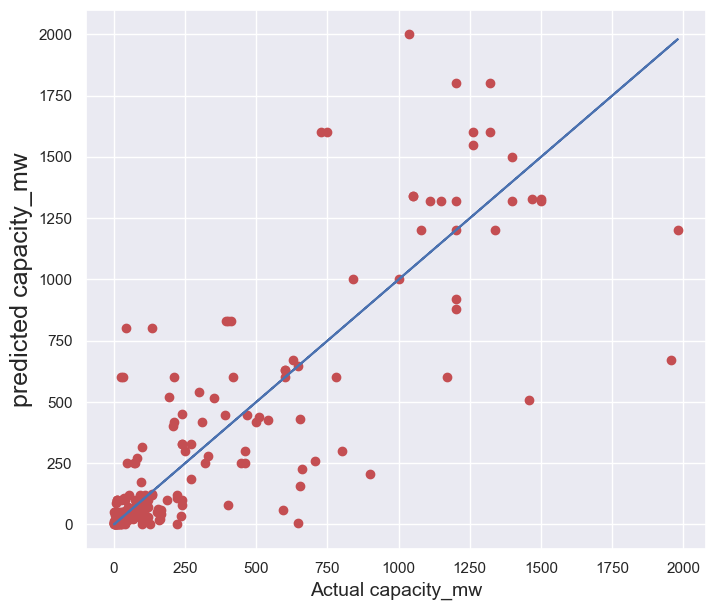

In [118]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [119]:
#R2 Score: 70.70277306613941
#Cross Val Score: 61.258431796049685
#Still the diffrence is very big as compare to linear model, Modle performance is poor.



In [120]:
#4. KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 77.64476396409827
Cross val Score : 74.38173341307164


In [121]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 97.76567076923078
Mean Squared Error: 36662.29628271354
Root Mean Square Error: 191.47400941828514


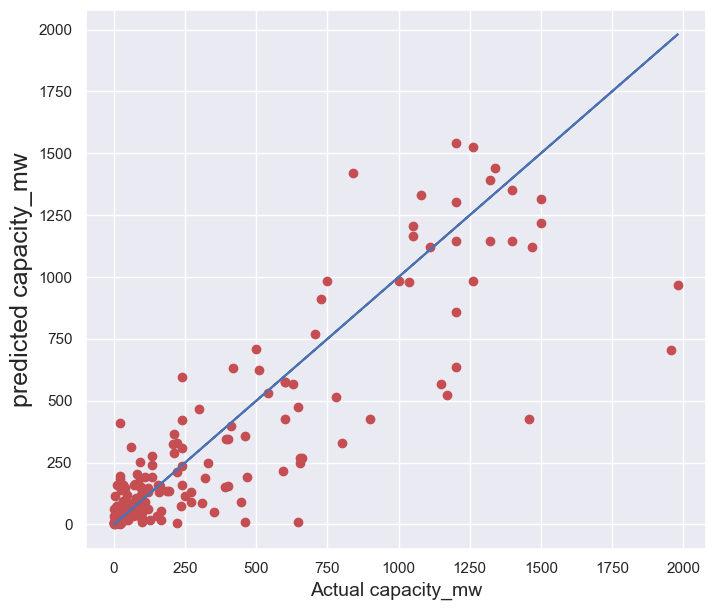

In [122]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [123]:
#R2 Score: 77.64476396409827
#Cross val Score : 74.38173341307164
#Diffrence in the scores are very less as compare to other models, we can consider this as the best model.





In [124]:
#5. Ensemble Techniques
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 82.41163376249506
Cross val Score : 76.41122513164053


In [125]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 86.93432835251878
Mean Squared Error: 28844.69182489094
Root Mean Square Error: 169.8372509930932


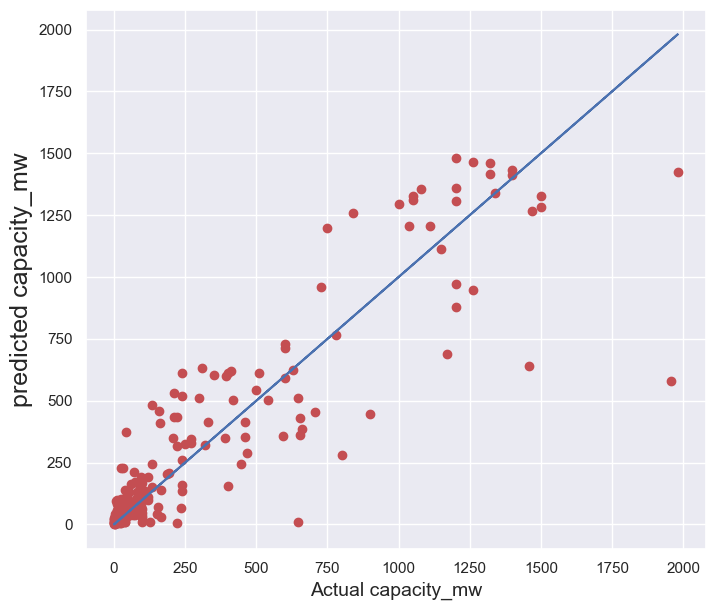

In [126]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [127]:
#7. GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )


R2 score: 82.41163376249506
Cross val Score : 73.17274590225705


In [128]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 86.93432835251878
Mean Squared Error: 28844.69182489094
Root Mean Square Error: 169.8372509930932


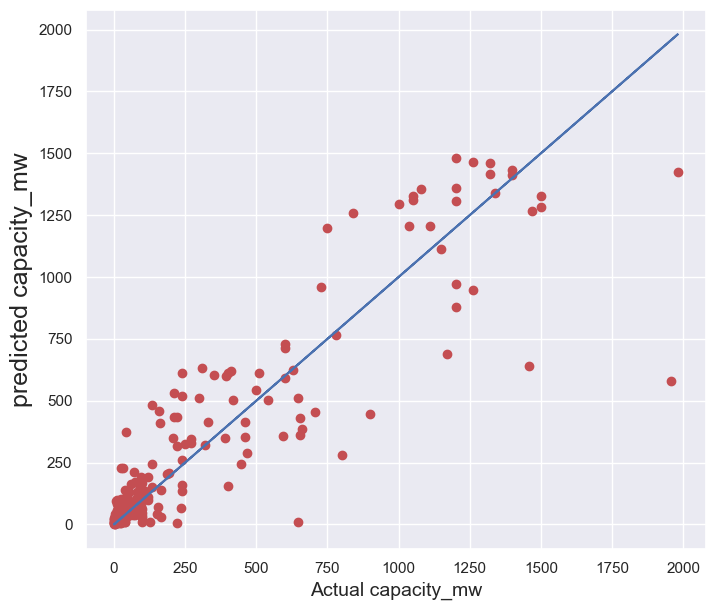

In [129]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [178]:
#RandomForestRegressor is stil the best model with R2 score: 77.64 Cross val Score : 74.381, lets try Hypertuning of the model.
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}


In [179]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 54.88974272494986
Cross val Score : 53.965204663825794


In [180]:
#We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

In [181]:
#Saving Best Model
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,2,1.620000
1,3,1.903333
2,3,2.356667
3,7,5.853333
4,3,2.586667
...,...,...
169,7,6.179963
170,3,1.921130
171,3,4.057556
172,6,6.713333


In [194]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [196]:
# deviding into fetures and target. 
x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']
x.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [197]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')

In [198]:
X2=pd.DataFrame(data=x)

In [199]:
#Scaling the data Using StandardScaler.
SDc=StandardScaler()
X2=SDc.fit_transform(X2)
X2

array([[-1.6833227 ,  1.15626742, -0.93885467, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.24978411,  0.59104013, -0.51903111, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.25138397,  0.12112001, -2.37998905, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       ...,
       [-0.48802138, -0.95235366, -0.24462176, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.13943645,  0.52249096, -0.77847826, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.72678912, -1.79828311,  0.23982923, ..., -0.02668675,
        -0.0118393 , -0.03537354]])

In [200]:
#Our data is now scaled, in next step we will check multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [201]:
dfy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])
dfy

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.683323,1.156267,-0.938855,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.249784,0.591040,-0.519031,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,-0.251384,0.121120,-2.379989,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.422961,0.443736,2.428832,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,1.768702,0.130362,1.244663,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,1.709760,-0.788809,0.211004,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.602083,-1.332201,0.400757,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.488021,-0.952354,-0.244622,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.139436,0.522491,-0.778478,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


In [202]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.279531
1,latitude,1.024334
2,longitude,1.148649
3,generation_gwh_2013,3.582231
4,generation_gwh_2014,6.286462
5,generation_gwh_2015,10.754176
6,generation_gwh_2016,9.760924
7,generation_gwh_2017,9.241425


In [203]:
dfy.drop('generation_gwh_2016', axis=1, inplace=True)
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.279103
1,latitude,1.023635
2,longitude,1.143874
3,generation_gwh_2013,3.579372
4,generation_gwh_2014,6.238030
5,generation_gwh_2015,9.383617
6,generation_gwh_2017,5.204272


In [204]:
x=dfy


In [205]:
#Model Development
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [206]:
#Chosing Best Random State
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  406 The Model performing Well
At Random State 406
Training Accuracy score is- 50.57803468208093
Testing Accuracy Score is- 50.57471264367817
At Random state  868 The Model performing Well
At Random State 868
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484


In [207]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=5,test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.47701149425287354


In [208]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  1  0  0  0  6]
 [ 0 18  1 17  0  0  1  4]
 [ 0  6  3  2  0  2  0  0]
 [ 0  9  0 31  0  0  6  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0  0  0  7  0  0 15  5]
 [ 0  1  0  5  0  0  8 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.51      0.44      0.47        41
           2       0.75      0.23      0.35        13
           3       0.48      0.61      0.53        51
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       0.50      0.56      0.53        27
           7       0.41      0.52      0.45        29

    accuracy                           0.48       174
   macro avg       0.37      0.32      0.32       174
weighted avg       0.47      0.48      0.46       174



In [209]:
#Cross validation of model
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 48.96073903002309
Accuracy Score:- 47.701149425287355


at cv:- 3
Cross Validation scre is:- 48.61071062411893
Accuracy Score:- 47.701149425287355


at cv:- 4
Cross Validation scre is:- 49.53490356716163
Accuracy Score:- 47.701149425287355


at cv:- 5
Cross Validation scre is:- 49.87974220981994
Accuracy Score:- 47.701149425287355


at cv:- 6
Cross Validation scre is:- 49.99201787994892
Accuracy Score:- 47.701149425287355


at cv:- 7
Cross Validation scre is:- 49.52324753662283
Accuracy Score:- 47.701149425287355


at cv:- 8
Cross Validation scre is:- 49.529604145429836
Accuracy Score:- 47.701149425287355


at cv:- 9
Cross Validation scre is:- 49.645618556701024
Accuracy Score:- 47.701149425287355




In [211]:
#SVC
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 59.195402298850574
Cross val Score : 59.2274040095141


In [212]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  0  0  0  0  0  0  7]
 [ 0 30  1  2  0  1  2  5]
 [ 0 10  3  0  0  0  0  0]
 [ 0 10  0 33  0  0  2  6]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  2]
 [ 0  2  0  3  0  0 13  9]
 [ 0  2  0  0  0  0  4 23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.55      0.73      0.62        41
           2       0.50      0.23      0.32        13
           3       0.87      0.65      0.74        51
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       0.62      0.48      0.54        27
           7       0.44      0.79      0.57        29

    accuracy                           0.59       174
   macro avg       0.43      0.39      0.38       174
weighted avg       0.60      0.59      0.58       174



In [ ]:
'''Accuracy_core: 59.724137931034484
Cross val Score : 59.34491026937919
Model performace is very poor.'''

In [213]:
#Ensemble Techniques

kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 65.51724137931035
Cross val Score : 65.13442915392456


In [214]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 1 34  0  2  0  0  1  3]
 [ 0  6  3  3  0  1  0  0]
 [ 1  6  0 34  0  0  1  9]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  3  0  0  1  0  0]
 [ 1  3  0  4  0  0 15  4]
 [ 1  0  2  1  0  0  4 21]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.67      0.83      0.74        41
           2       0.38      0.23      0.29        13
           3       0.77      0.67      0.72        51
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       0.71      0.56      0.63        27
           7       0.55      0.72      0.63        29

    accuracy                           0.66       174
   macro avg       0.52      0.51      0.50       174
weighted avg       0.65      0.66      0.64       174



In [215]:
'''accuracy_score:  65.51711494252874
Cross val Score : 65.13442915392456
Model is perfroming well as compare to SVC , but diffrence is more, Lets try anaother one
Both accuracy score and Cross val score having less score, Model performance is very good.'''

'accuracy_score:  65.51711494252874\nCross val Score : 65.13442915392456\nModel is perfroming well as compare to SVC , but diffrence is more, Lets try anaother one\nBoth accuracy score and Cross val score having less score, Model performance is very good.'

In [216]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 67.24137931034483
Cross val score is: 65.70463812436289


In [217]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))


[[ 3  1  0  0  0  0  0  3]
 [ 1 32  1  3  1  1  0  2]
 [ 0  7  3  2  0  1  0  0]
 [ 2  4  2 37  0  0  1  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 2  2  0  4  0  0 17  2]
 [ 1  0  0  3  0  0  3 22]]
              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.68      0.78      0.73        41
           2       0.38      0.23      0.29        13
           3       0.76      0.73      0.74        51
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.81      0.63      0.71        27
           7       0.65      0.76      0.70        29

    accuracy                           0.67       174
   macro avg       0.53      0.52      0.52       174
weighted avg       0.67      0.67      0.67       174



In [218]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  72.41379310344827
Cross val Score : 70.78767414203195


In [219]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 2 31  1  3  0  1  1  2]
 [ 0  5  3  4  0  1  0  0]
 [ 2  5  0 37  0  0  1  6]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 0  1  0  3  0  0 20  3]
 [ 1  0  0  0  0  0  2 26]]
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.72      0.76      0.74        41
           2       0.50      0.23      0.32        13
           3       0.79      0.73      0.76        51
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.83      0.74      0.78        27
           7       0.68      0.90      0.78        29

    accuracy                           0.72       174
   macro avg       0.58      0.60      0.58       174
weighted avg       0.72      0.72      0.71       174



In [220]:
#Both the score are very close, Model Performace is good.
AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  39.08045977011494
Cross val Score : 34.067065919130144


In [221]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0  0  0  0  7  0]
 [ 0 18  0 10  0  1 12  0]
 [ 0  2  0  9  0  1  1  0]
 [ 0  6  0 24  0  0 21  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  2  0  1  1  0]
 [ 0  0  0  2  0  0 25  0]
 [ 0  0  0  4  0  0 25  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.44      0.53        41
           2       0.00      0.00      0.00        13
           3       0.46      0.47      0.47        51
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       0.27      0.93      0.42        27
           7       0.00      0.00      0.00        29

    accuracy                           0.39       174
   macro avg       0.22      0.25      0.21       174
weighted avg       0.34      0.39      0.33       174



In [222]:
#Score is very low, but RandomForestClassifier is still best.

In [223]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 53.44827586206896
Cross Val Score is : 53.58583927964662


In [224]:
#Model performance is poor RandomForestClassifier is still best model.

In [225]:
#Hyperparameter Tuning of the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [228]:
rf=RandomForestClassifier(criterion='entropy',max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=1200 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  70.6896551724138
Cross val Score : 72.8699456337071


In [229]:
#RandomForestClassifier with accuracy_score:  accuracy_score:  70.6896551724138 Cross val Score : 72.8699456337071 is our best model.

In [230]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))

In [231]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,2,1
1,3,1
2,3,1
3,7,3
4,3,3
...,...,...
169,7,7
170,3,0
171,3,6
172,6,7
